In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cuqi

# Priors on smooth and discrete-smooth signals
In this notebook we will explore the effect of different prior when used on different types of signals. In particular we wll compare a smooth continuous signal and a smooth signal with "jump" at certain points; this I will call a discrete-smooth signal. Then we will contruct Bayesian inverse problems and use a Gaussian prior and a Laplace prior on each signal.

We hope to see that the Laplace prior will give better results around the discrete points.

We initially contruct the two different signals:

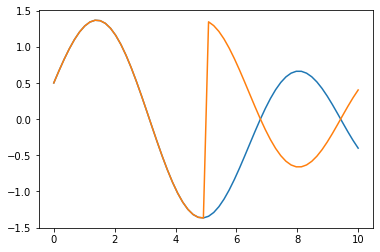

In [45]:
    n = 60
    xln = np.linspace(0,10,n)
    x_sm = np.sin(xln)+0.5*np.cos(xln/2)

    x_disc = np.zeros(n); 
    for i in range(0,int(n/2)):
        x_disc[i] = x_sm[i]
    for i in range(int(n/2),n):
        x_disc[i] = -x_sm[i]
    


    plt.plot(xln,x_sm,xln,x_disc)

We contruct a convolution matrix and compute the observed data with added noise:

In [47]:
# Convolution vector
r = np.zeros(n)
r[0] = 0.5; r[1] = 0.2; r[2] = 0.05  

# Convolution matrix
A = sp.linalg.toeplitz(r)

# noisy observations
sigma = 0.05                       # Standard deviation of noise
y_sm  = A@x_sm + sigma*np.random.randn(n)
y_disc  = A@x_disc + sigma*np.random.randn(n)

Using cuqi we create a model using the convolution matrix, compute the likelihood for the smooth and dicrete-smooth signal and the Gaussian and Laplace prior.

Computing 5000 samples
Using direct sampling by Cholesky factor of inverse covariance. Only works for small-scale problems with dim<=5000.
 Sample 5000 / 5000
Elapsed time: 0.29399657249450684
Plotting 95 percent confidence interval
Computing 5000 samples
Using direct sampling by Cholesky factor of inverse covariance. Only works for small-scale problems with dim<=5000.
 Sample 5000 / 5000
Elapsed time: 0.31600093841552734
Plotting 95 percent confidence interval
Computing 5000 samples
Using Component-wise Metropolis-Hastings sampler
 Sample 6000 / 6000
Average acceptance rate all components: 0.33971000000000007 

Elapsed time: 320.5917670726776
Plotting 95 percent confidence interval
Computing 5000 samples
Using Component-wise Metropolis-Hastings sampler
 Sample 6000 / 6000
Average acceptance rate all components: 0.33491 

Elapsed time: 425.14640188217163
Plotting 95 percent confidence interval


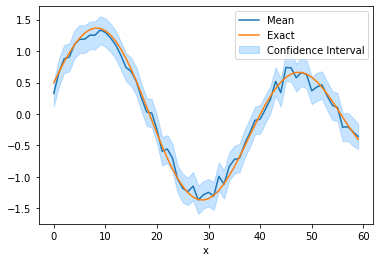

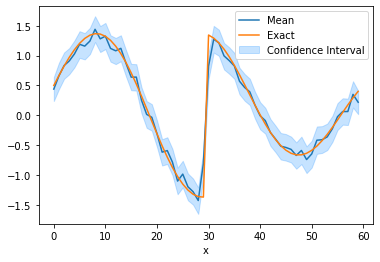

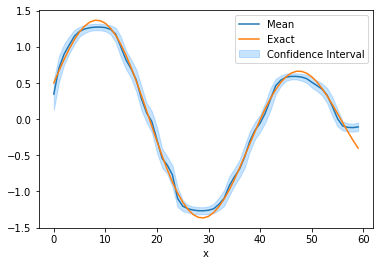

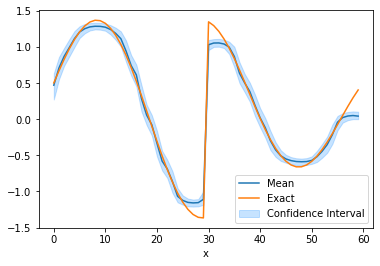

In [48]:
model = cuqi.model.LinearModel(A)
like_sm = cuqi.distribution.Gaussian(mean=model, std=0.05).to_likelihood(y_sm)
like_disc = cuqi.distribution.Gaussian(mean=model, std=0.05).to_likelihood(y_disc)
pr_Gauss = cuqi.distribution.Gaussian(mean=np.zeros(n), std=0.2)
pr_Lap = cuqi.distribution.Laplace_diff(location=np.zeros(model.domain_dim), scale=0.01, bc_type='zero')


We use the cuqi BayesianProblem inteface to do UQ analysis and plot the results for each combination of signal and prior along with the exact signal.

In [ ]:
plt.figure(1)
BP = cuqi.problem.BayesianProblem(like_sm, pr_Gauss)
BP.UQ(exact=x_sm)

plt.figure(2)
cuqi.problem.BayesianProblem(like_disc,pr_Gauss).UQ(exact=x_disc)

plt.figure(3)
cuqi.problem.BayesianProblem(like_sm,pr_Lap).UQ(exact=x_sm)

plt.figure(4)
cuqi.problem.BayesianProblem(like_disc,pr_Lap).UQ(exact=x_disc)